# Sampling a complex distribution function  

by Emily Anderson   
Modifications by Tonatiuh Rangel    

In this notebook, we show how to sample on any given random distribution using *rejection sampling*    

## Contents    
(https://github.com/trangel/stats-with-python/blob/master/notebooks/Sampling a random distribution.ipynb">Confidence intervals</a>]
1. [Defining our sample and desired functions](#defining_functions)
2. [Rejection sampling](#rejection_sampling)

In [1]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

<a id='defining_functions'></a>
## Defining our sample and desired functions   
Let's define a random complicated distribution that we would like to sample

In [2]:
# This is our desired PDF function
def f(x):
    '''This is a random function centered at 10'''
    
    xx = x - 10 #shift origin
    if xx < 0:
        y = 2**xx
    elif xx >=0:
        y =  0.5**xx
    return y

In [13]:
# Define a sample function    
loc = 10
scale = 2

#Xnorm = stats.norm(loc=a,scale=scale)

# A dgamma is similar to our desired function
Xsample = stats.dgamma(a=0.5,loc=loc ,scale = scale)


In [14]:
# Let's define a grid from 0 to 20   
x = np.linspace(0,20,100) 

# Get the desired PDF for that grid
pdf=[]
for xx in x:
    pdf.append(f(xx))

pdf = np.array(pdf)

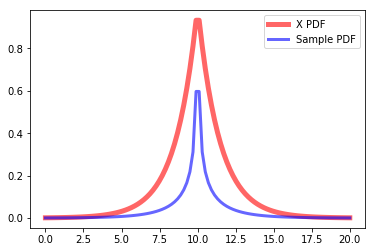

In [16]:
ax = plt.plot(x, pdf,'r-', lw=5, alpha=0.6, label='X PDF')
ax = plt.plot(x,Xsample.pdf(x),'b-',lw=3,alpha=0.6, label='Sample PDF')
plt.legend(loc='best')
plt.show()

<a id='rejection_sampling'></a>   
## Rejection sampling   
We will now use a normal distribution to simulate our desired distribution   

scaling constant is 4.89155790229


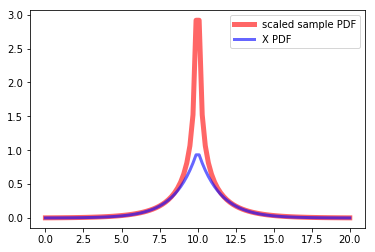

In [17]:
#c is our scaling constant so that our proposed distribution (normal) envelops our
#desired distribution (X)
c = max(pdf/Xsample.pdf(x))
print ('scaling constant is ' + str(c))


plt.plot(x, c*Xsample.pdf(x),'r-', lw=5, alpha=0.6, label='scaled sample PDF')
plt.plot(x,pdf,'b-',lw=3,alpha=0.6, label='X PDF')
plt.legend(loc='best')
plt.show()

In [24]:
N = 10000 # the total of samples we wish to generate
accepted = 0 # the number of accepted samples
samples = np.zeros(N)
count = 0 # the total count of proposals

# generation loop
while (accepted < N):
    
    # draw a sample from our proposal distribution
    sample = Xsample.rvs(1)
    
    # pick a uniform number on [0, 1)
    y = np.random.uniform(0,1)
    
    # Do the accept/reject comparison
    if y < f(sample)/(c*Xsample.pdf(sample)):
        samples[accepted] = sample
        accepted += 1
    
    count +=1
    
print("Count", count, "Accepted", accepted)


Count 17117 Accepted 10000


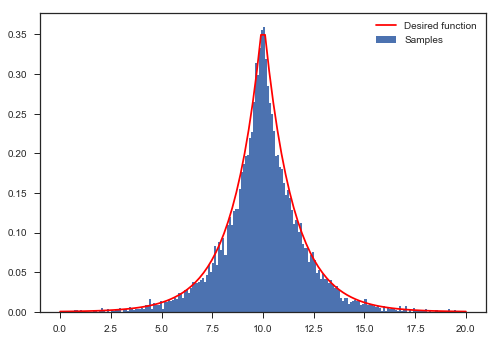

In [37]:
from scipy.linalg import norm
sns.set(style="ticks")


bins = np.arange(0,20,0.1)

# plot the histogram
plt.hist(samples,bins=bins, label='Samples',normed=True);

# Plot normalized PDF function
plt.plot(x, pdf/norm(pdf), 'r', label='Desired function')

# turn on the legend
plt.legend()
plt.show()